In [1]:
using Revise

In [2]:
using JSON2, PyPlot

In [3]:
using ClimateMARGO.Models

┌ Info: Precompiling ClimateMARGO [d3f62095-a717-45bf-aadc-ac9dfc258fa6]
└ @ Base loading.jl:1260


In [4]:
using ClimateMARGO.Diagnostics

In [5]:
using ClimateMARGO.Utils

In [20]:
# Domain
dom = Domain(1., 2050., 2020., 2200.)

# Physics
phys = Physics(460., 1.1, 4.97, 1.13, 106, 0.73, 0.5)

# Economics
econ = Economics(
    100. *ones(size(t(dom))),
    0.02/(3.0)^2,
    0.01,
    8.5,
    0.02, 0.09, 5., 10.,
    0., 0., 0., 0.,
    ramp_emissions(dom), 
    zeros(size(t(dom)))
)

# Controls
cont = Models.init_zero_controls(Array(t(dom)));
cont.remove .+= 0.1;
cont.mitigate .+= 0.15;
cont.geoeng .+= 0.075;
cont.adapt .+= 0.05;

# Full model
m = ClimateModel(
    "test",
    dom,
    econ,
    phys,
    cont
);

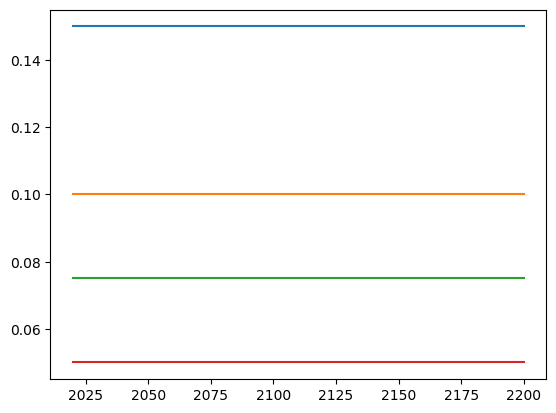

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x16011fe80>

In [21]:
plot(t(m), cont.mitigate)
plot(t(m), cont.remove)
plot(t(m), cont.geoeng)
plot(t(m), cont.adapt)

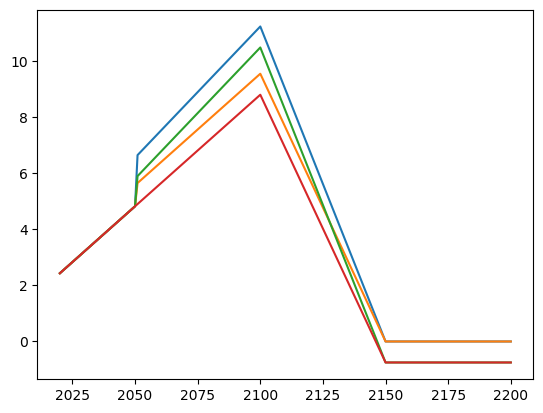

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1603d5a20>

In [22]:
plot(t(m), effective_emissions(m))
plot(t(m), effective_emissions(m, M=true))
plot(t(m), effective_emissions(m, R=true))
plot(t(m), effective_emissions(m, M=true, R=true))

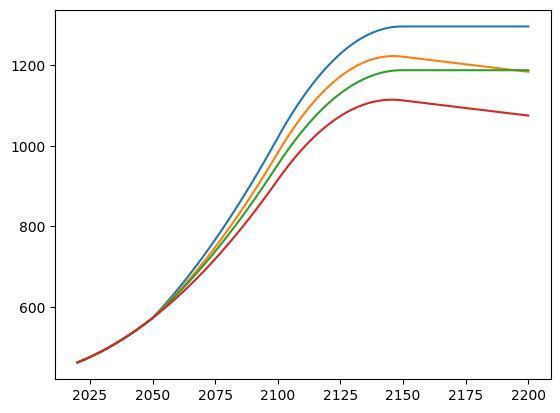

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x160564c50>

In [23]:
plot(t(m), c(m))
plot(t(m), c(m, R=true))
plot(t(m), c(m, M=true))
plot(t(m), c(m, M=true, R=true))

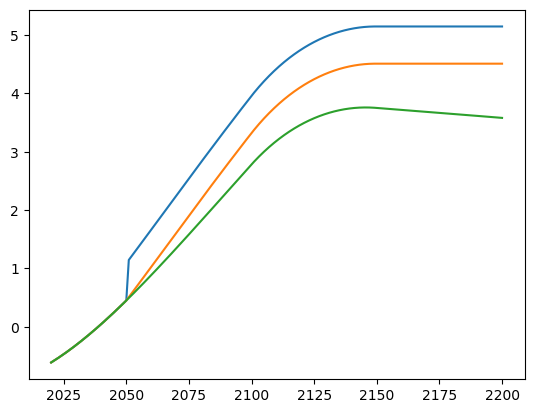

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1605d5f28>

In [24]:
plot(t(m), F(m))
plot(t(m), F(m, G=true))
plot(t(m), F(m, G=true, M=true, R=true))

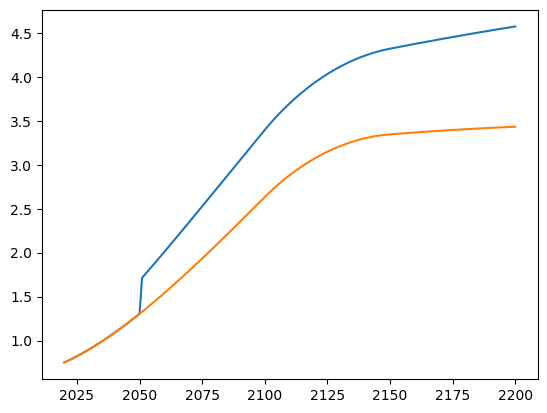

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x160761d68>

In [25]:
plot(t(m), T(m))
plot(t(m), T(m, M=true, R=true, G=true, A=true))